## Final Project Submission

Please fill out:
* Student name: Joe Sanchez
* Student pace: self paced 
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


---
# **Tanzanian Water Pipeline Project** - Predicting the Functionality of Water Pipelines in Tanzania using Machine Learning Classification Models
---
## Code by Joe Sanchez

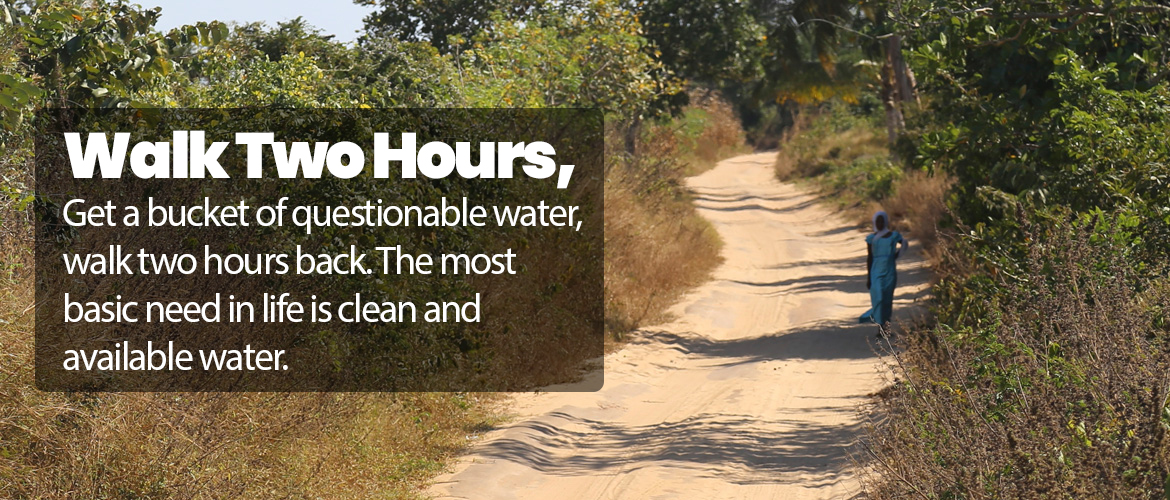

---
## Table of Contents
1. Business Understanding
2. Data Understanding
3. Data Preprocessing/Preperation
4. Modeling
5. Final Model Evaluation
6. Appendix

In [1]:
# Your code here - remember to use markdown cells for comments as well!
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandasql import sqldf
import missingno as msno
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix, precision_score, recall_score, plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

import category_encoders as ce
import time

In [2]:
# This will be a Type I error classification project
# The probability of making a Type I error is the significance level, or alpha (α)
# My statistical decision making will be based off a Type I error (false positive);
# Testing the functionality of water pipelines
# Type I: Test results stating a water pipeline is "non-functional", but it actually is "functional"

In [3]:
sns.set_style("ticks", {"axes.facecolor": ".9"})

In [24]:
df1.head()

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional


In [14]:
df1 = pd.read_csv('Tanzanian_Datasets/Dataset-1.csv')
df2 = pd.read_csv('Tanzanian_Datasets/Dataset-2.csv')
df3 = pd.read_csv('Tanzanian_Datasets/Dataset-3.csv')

In [15]:
value_count_perc = np.round(df1['status_group'].value_counts(normalize=True),2)
print(value_count_perc)

functional                 0.54
non functional             0.38
functional needs repair    0.07
Name: status_group, dtype: float64


Text(1000, 0.0, '0.07')

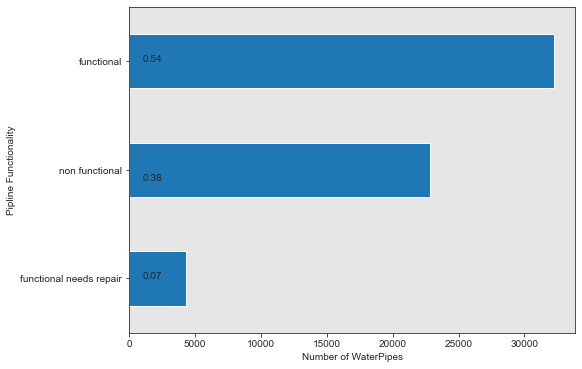

In [16]:
plt.figure(figsize=(8,6))
df1.status_group.value_counts().sort_values().plot(kind='barh')
plt.xlabel('Number of WaterPipes')
plt.ylabel('Pipline Functionality')
plt.text(1000,2,value_count_perc[0])
plt.text(1000,.9,value_count_perc[1])
plt.text(1000,.0,value_count_perc[2])

In [17]:
pysqldf = lambda q: sqldf(q, globals())

In [18]:
d = """SELECT * FROM df1
       JOIN df2
       ON df1.id = df2.id;"""

In [19]:
df = pysqldf(d)

In [20]:
pd.set_option('display.max_columns', None)

In [21]:
df

,id,status_group,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,functional,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,1.0,GeoData Consultants Ltd,VWC,Roman,0.0,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,functional,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,None,1.0,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,functional,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,1.0,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,1.0,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,non functional,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,1.0,GeoData Consultants Ltd,VWC,None,1.0,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,functional,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,1.0,GeoData Consultants Ltd,None,None,1.0,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,functional,60739,10.0,2013-05-03,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,0,Pangani,Kiduruni,Kilimanjaro,3,5,Hai,Masama Magharibi,125,1.0,GeoData Consultants Ltd,Water Board,Losaa Kia water supply,1.0,1999,gravity,gravity,gravity,water board,user-group,pay per bucket,per bucket,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
59396,27263,functional,27263,4700.0,2011-05-07,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,0,Rufiji,Igumbilo,Iringa,11,4,Njombe,Ikondo,56,1.0,GeoData Consultants Ltd,VWC,Ikondo electrical water sch,1.0,1996,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe
59397,37057,functional,37057,0.0,2011-04-11,None,0,None,34.017087,-8.750434,Mashine,0,Rufiji,Madungulu,Mbeya,12,7,Mbarali,Chimala,0,1.0,GeoData Consultants Ltd,VWC,None,0.0,0,swn 80,swn 80,handpump,vwc,user-group,pay monthly,monthly,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump
59398,31282,functional,31282,0.0,2011-03-08,Malec,0,Musa,35.861315,-6.378573,Mshoro,0,Rufiji,Mwinyi,Dodoma,1,4,Chamwino,Mvumi Makulu,0,1.0,GeoData Consultants Ltd,VWC,None,1.0,0,nira/tanira,nira/tanira,handpump,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump


In [12]:
df[df['status_group'] == 'functional needs repair']

,id,status_group,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
18,34169,functional needs repair,34169,0.0,2011-07-22,Hesawa,1162,DWE,32.920154,-1.947868,Ngomee,0,Lake Victoria,Center,Mwanza,19,1,Ukerewe,Ilangala,1000,NaN,GeoData Consultants Ltd,None,None,1.0,1999,other,other,other,vwc,user-group,never pay,never pay,milky,milky,insufficient,insufficient,spring,spring,groundwater,other,other
22,58500,functional needs repair,58500,0.0,2011-10-04,Unicef,1510,DWE,34.586901,-8.980014,Shuleni,0,Rufiji,Mkanivega,Iringa,11,4,Njombe,Usuka,350,1.0,GeoData Consultants Ltd,WUA,wanging'ombe water supply s,1.0,1978,gravity,gravity,gravity,wua,user-group,never pay,never pay,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe
25,22308,functional needs repair,22308,0.0,2013-02-25,Government Of Tanzania,1273,DWE,37.422751,-3.317536,Kwa Tukai,0,Pangani,Kitereni,Kilimanjaro,3,4,Moshi Rural,Kimochi,140,1.0,GeoData Consultants Ltd,VWC,Komaka mandaka,1.0,1974,gravity,gravity,gravity,vwc,user-group,unknown,unknown,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
32,57238,functional needs repair,57238,0.0,2013-03-19,Government Of Tanzania,1481,DWE,37.492334,-3.290627,Kwa Philip Lyimo,0,Pangani,Mosheni,Kilimanjaro,3,4,Moshi Rural,Kilema Kati,180,0.0,GeoData Consultants Ltd,Other,Mae pipeline,1.0,1972,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,insufficient,insufficient,river,river/lake,surface,other,other
44,1843,functional needs repair,1843,20.0,2013-03-18,Government Of Tanzania,1007,DWE,36.806079,-3.478559,Kwa Bariki,0,Pangani,Marurani Juu,Arusha,2,2,Arusha Rural,Nduruma,100,1.0,GeoData Consultants Ltd,VWC,Machumba estate pipe line,1.0,2000,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59322,44114,functional needs repair,44114,6000.0,2013-02-14,Unicef,532,UNICEF,36.985457,-11.467225,Misepelo,0,Ruvuma / Southern Coast,Kariakoo,Ruvuma,10,1,Tunduru,Nalasi,1,1.0,GeoData Consultants Ltd,VWC,None,0.0,1999,swn 80,swn 80,handpump,vwc,user-group,pay annually,annually,soft,good,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump
59328,512,functional needs repair,512,2000.0,2013-01-29,Tcrs,1497,TCRS,34.799452,-4.349604,Mitogo,0,Internal,Mtundua,Singida,13,1,Iramba,Ilunda,195,1.0,GeoData Consultants Ltd,VWC,None,1.0,1997,nira/tanira,nira/tanira,handpump,vwc,user-group,pay when scheme fails,on failure,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump
59333,21732,functional needs repair,21732,50.0,2013-02-13,Kiuma,706,KIUMA,36.961390,-11.305345,Kwa Rashid Swalehe,0,Ruvuma / Southern Coast,Ruvuma,Ruvuma,10,1,Tunduru,Marumba,1,1.0,GeoData Consultants Ltd,VWC,Mbati Water Supply,0.0,2011,submersible,submersible,submersible,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
59345,68576,functional needs repair,68576,600.0,2013-01-25,Isf,962,DWE,29.729909,-4.801508,Tupendane,0,Lake Tanganyika,Kabanga,Kigoma,16,3,Kigoma Rural,Mahembe,500,1.0,GeoData Consultants Ltd,WUG,Mkongoro Two,1.0,2008,gravity,gravity,gravity,vwc,user-group,pay monthly,monthly,soft,good,enough,enough,river,river/lake,surface,communal standpipe multiple,commun

In [13]:
## one hot code for getting rid of duplicated columns which in this case was the 'id' column
DF = df.loc[:,~df.columns.duplicated()].copy()

In [14]:
DF.head()

,id,status_group,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,functional,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,1.0,GeoData Consultants Ltd,VWC,Roman,0.0,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,functional,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,None,1.0,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,functional,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,1.0,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,1.0,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,non functional,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,1.0,GeoData Consultants Ltd,VWC,None,1.0,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,functional,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,1.0,GeoData Consultants Ltd,None,None,1.0,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [15]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   status_group           59400 non-null  object 
 2   amount_tsh             59400 non-null  float64
 3   date_recorded          59400 non-null  object 
 4   funder                 55765 non-null  object 
 5   gps_height             59400 non-null  int64  
 6   installer              55745 non-null  object 
 7   longitude              59400 non-null  float64
 8   latitude               59400 non-null  float64
 9   wpt_name               59400 non-null  object 
 10  num_private            59400 non-null  int64  
 11  basin                  59400 non-null  object 
 12  subvillage             59029 non-null  object 
 13  region                 59400 non-null  object 
 14  region_code            59400 non-null  int64  
 15  di

<AxesSubplot:>

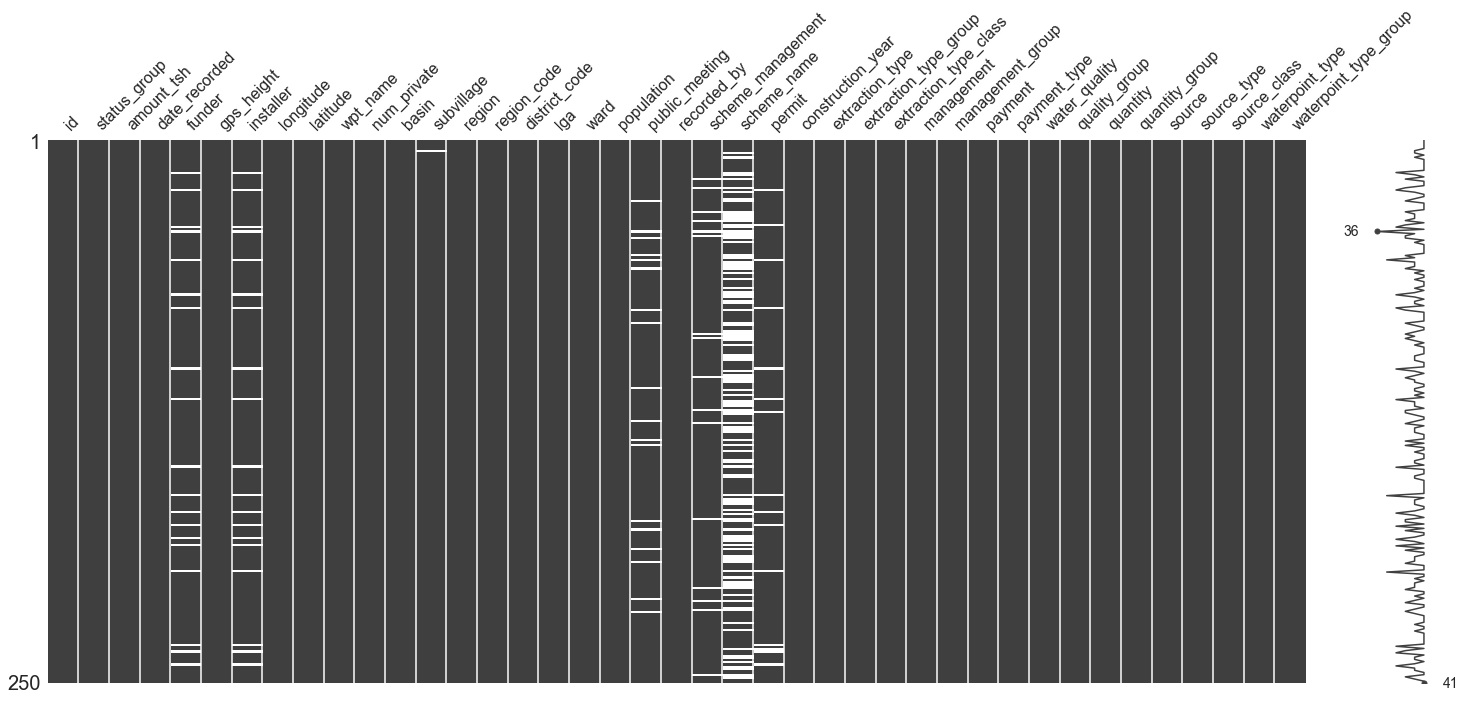

In [16]:
%matplotlib inline
msno.matrix(DF.sample(250))

In [17]:
DF.describe()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,public_meeting,permit,construction_year
count,59400.000000,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000,56066.000000,56344.000000,59400.000000
mean,37115.131768,317.650385,668.297239,34.077427,-5.706033e+00,0.474141,15.297003,5.629747,179.909983,0.909838,0.689550,1300.652475
std,21453.128371,2997.574558,693.116350,6.567432,2.946019e+00,12.236230,17.587406,9.633649,471.482176,0.286416,0.462682,951.620547
min,0.000000,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18519.750000,0.000000,0.000000,33.090347,-8.540621e+00,0.000000,5.000000,2.000000,0.000000,1.000000,0.000000,0.000000
50%,37061.500000,0.000000,369.000000,34.908743,-5.021597e+00,0.000000,12.000000,3.000000,25.000000,1.000000,1.000000,1986.000000
75%,55656.500000,20.000000,1319.250000,37.178387,-3.326156e+00,0.000000,17.000000,5.000000,215.000000,1.000000,1.000000,2004.000000
max,74247.000000,350000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,1.000000,1.000000,2013.000000


In [18]:
# displaying null values for columns to determine how to manually replace
# bool_series = pd.isnull(DF['permit'])

# DF[bool_series]

In [19]:
# DF['funder'].fillna('No Funder', inplace=True)
# DF['installer'].fillna('No Installer', inplace=True)
# DF['subvillage'].fillna('No Subvillage', inplace=True)
# DF['public_meeting'].fillna(0.0, inplace=True)
# DF['scheme_management'].fillna('None', inplace=True)
# DF['scheme_name'].fillna('None', inplace=True)
# DF['permit'].fillna('No Permit', inplace=True)

In [20]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   status_group           59400 non-null  object 
 2   amount_tsh             59400 non-null  float64
 3   date_recorded          59400 non-null  object 
 4   funder                 55765 non-null  object 
 5   gps_height             59400 non-null  int64  
 6   installer              55745 non-null  object 
 7   longitude              59400 non-null  float64
 8   latitude               59400 non-null  float64
 9   wpt_name               59400 non-null  object 
 10  num_private            59400 non-null  int64  
 11  basin                  59400 non-null  object 
 12  subvillage             59029 non-null  object 
 13  region                 59400 non-null  object 
 14  region_code            59400 non-null  int64  
 15  di

In [21]:
# Functional needs repair can be used in a linear regression model on its own
# I am removing the 3rd target variable to lessen complexity 

DF_Needs_Repair = DF[DF['status_group'] == 'functional needs repair']

In [22]:
DF.drop(DF.index[DF['status_group'] == 'functional needs repair'], inplace=True)

In [23]:
DF

,id,status_group,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,functional,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,1.0,GeoData Consultants Ltd,VWC,Roman,0.0,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,functional,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,None,1.0,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,functional,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,1.0,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,1.0,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,non functional,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,1.0,GeoData Consultants Ltd,VWC,None,1.0,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,functional,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,1.0,GeoData Consultants Ltd,None,None,1.0,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,functional,10.0,2013-05-03,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,0,Pangani,Kiduruni,Kilimanjaro,3,5,Hai,Masama Magharibi,125,1.0,GeoData Consultants Ltd,Water Board,Losaa Kia water supply,1.0,1999,gravity,gravity,gravity,water board,user-group,pay per bucket,per bucket,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
59396,27263,functional,4700.0,2011-05-07,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,0,Rufiji,Igumbilo,Iringa,11,4,Njombe,Ikondo,56,1.0,GeoData Consultants Ltd,VWC,Ikondo electrical water sch,1.0,1996,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe
59397,37057,functional,0.0,2011-04-11,None,0,None,34.017087,-8.750434,Mashine,0,Rufiji,Madungulu,Mbeya,12,7,Mbarali,Chimala,0,1.0,GeoData Consultants Ltd,VWC,None,0.0,0,swn 80,swn 80,handpump,vwc,user-group,pay monthly,monthly,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump
59398,31282,functional,0.0,2011-03-08,Malec,0,Musa,35.861315,-6.378573,Mshoro,0,Rufiji,Mwinyi,Dodoma,1,4,Chamwino,Mvumi Makulu,0,1.0,GeoData Consultants Ltd,VWC,None,1.0,0,nira/tanira,nira/tanira,handpump,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump


In [24]:
# COLUMN DOCUMENTATION (NOT INCLUDING 'id' AND 'status_group')
# ---------------------------------------------------------------------------------
# amount_tsh - Total static head (amount water available to waterpoint)
# date_recorded - The date the row was entered
# funder - Who funded the well
# gps_height - Altitude of the well
# installer - Organization that installed the well
# longitude - GPS coordinate
# latitude - GPS coordinate
# wpt_name - Name of the waterpoint if there is one
# num_private -
# basin - Geographic water basin
# subvillage - Geographic location
# region - Geographic location
# region_code - Geographic location (coded)
# district_code - Geographic location (coded)
# lga - Geographic location
# ward - Geographic location
# population - Population around the well
# public_meeting - True/False
# recorded_by - Group entering this row of data
# scheme_management - Who operates the waterpoint
# scheme_name - Who operates the waterpoint
# permit - If the waterpoint is permitted
# construction_year - Year the waterpoint was constructed
# extraction_type - The kind of extraction the waterpoint uses
# extraction_type_group - The kind of extraction the waterpoint uses
# extraction_type_class - The kind of extraction the waterpoint uses
# management - How the waterpoint is managed
# management_group - How the waterpoint is managed
# payment - What the water costs
# payment_type - What the water costs
# water_quality - The quality of the water
# quality_group - The quality of the water
# quantity - The quantity of water
# quantity_group - The quantity of water
# source - The source of the water
# source_type - The source of the water
# source_class - The source of the water
# waterpoint_type - The kind of waterpoint
# waterpoint_type_group - The kind of waterpoint

In [25]:
# COLUMNS TO BE EXAMINED/REMOVED:

# REMOVED
#----------------------------------------------------
# id - (irrelevant)
# date_recorded - (date of entry seems irrelivant)
# num_private - (no entries, no documentation)
# region_code - (already a region geographic location)
# district_code - (already a region geographic location)
# lga - (already a region geographic location)
# ward - (already a region geographic location)
# population - (ran the value_counts, found out that 40% of the input values are 0 and 12% are values of 1)
# recorded_by - (all input values are by "GeoData Consultants")
# scheme_name - (ran the value_counts, found out that 48% of the input values are null)
# extraction_type - (to lessen complexity while still keeping relevant extraction source, contains 18 categories)
# extraction_type_group - (to lessen complexity while still keeping relevant extraction source, contains 13 categories)
# management_group - (value_counts showed 88% of input values were "user_group")
# payment_type - (displays the same values as "payment" with less description)
# quality_group - (seems to have generalized the quality of the water, whereas )
# quantity_group - (displays same values as "quantity")
# source - (to lessen complexity)
# source_class - (too vague)
# waterpoint_type_group - (Only difference compared to "waterpoint_type" is communal standpipe and communal standpipe multiple are combined)

# EXAMINE FURTHER
#---------------------------------------------------
# longitude - (plot with latitude to create a numeric column with values reflecting x/y coordinates)
# latitude - (plot with longitude to create a numeric column with values reflecting x/y coordinates)

In [26]:
columns_tobe_dropped = DF[['id','date_recorded','num_private','region_code','district_code','lga','ward','population','recorded_by','scheme_name',
                         'extraction_type','extraction_type_group','management_group','payment_type','quality_group','quantity_group',
                          'source','source_class','waterpoint_type_group']]

In [27]:
DF = DF.drop(columns_tobe_dropped, axis = 1)

In [28]:
DF

,status_group,amount_tsh,funder,gps_height,installer,longitude,latitude,wpt_name,basin,subvillage,region,public_meeting,scheme_management,permit,construction_year,extraction_type_class,management,payment,water_quality,quantity,source_type,waterpoint_type
0,functional,6000.0,Roman,1390,Roman,34.938093,-9.856322,none,Lake Nyasa,Mnyusi B,Iringa,1.0,VWC,0.0,1999,gravity,vwc,pay annually,soft,enough,spring,communal standpipe
1,functional,0.0,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,Lake Victoria,Nyamara,Mara,NaN,Other,1.0,2010,gravity,wug,never pay,soft,insufficient,rainwater harvesting,communal standpipe
2,functional,25.0,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,Pangani,Majengo,Manyara,1.0,VWC,1.0,2009,gravity,vwc,pay per bucket,soft,enough,dam,communal standpipe multiple
3,non functional,0.0,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,Ruvuma / Southern Coast,Mahakamani,Mtwara,1.0,VWC,1.0,1986,submersible,vwc,never pay,soft,dry,borehole,communal standpipe multiple
4,functional,0.0,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,Lake Victoria,Kyanyamisa,Kagera,1.0,None,1.0,0,gravity,other,never pay,soft,seasonal,rainwater harvesting,communal standpipe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,functional,10.0,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,Pangani,Kiduruni,Kilimanjaro,1.0,Water Board,1.0,1999,gravity,water board,pay per bucket,soft,enough,spring,communal standpipe
59396,functional,4700.0,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,Rufiji,Igumbilo,Iringa,1.0,VWC,1.0,1996,gravity,vwc,pay annually,soft,enough,river/lake,communal standpipe
59397,functional,0.0,None,0,None,34.017087,-8.750434,Mashine,Rufiji,Madungulu,Mbeya,1.0,VWC,0.0,0,handpump,vwc,pay monthly,fluoride,enough,borehole,hand pump
59398,functional,0.0,Malec,0,Musa,35.861315,-6.378573,Mshoro,Rufiji,Mwinyi,Dodoma,1.0,VWC,1.0,0,handpump,vwc,never pay,soft,insufficient,shallow well,hand pump


<AxesSubplot:>

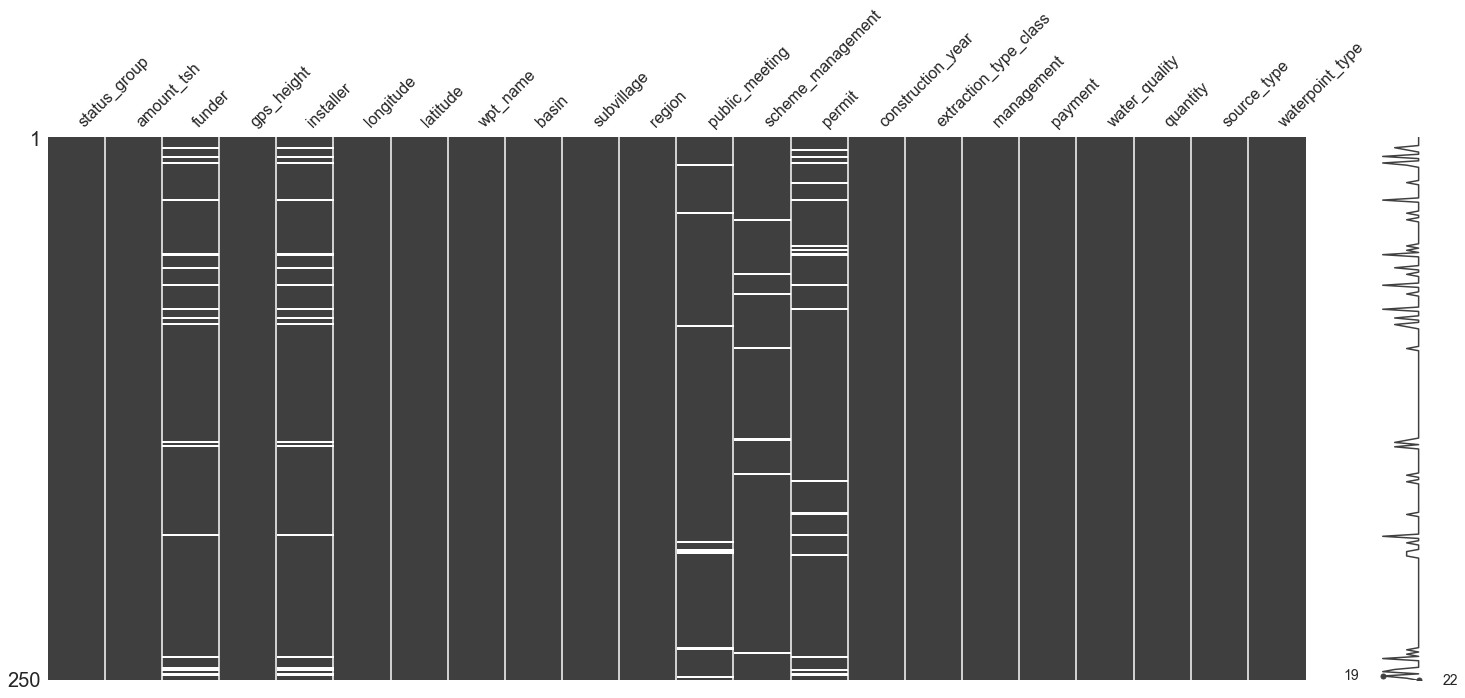

In [29]:
# displaying second null value matrix to view current DataFrame 
%matplotlib inline
msno.matrix(DF.sample(250))

<AxesSubplot:xlabel='latitude', ylabel='longitude'>

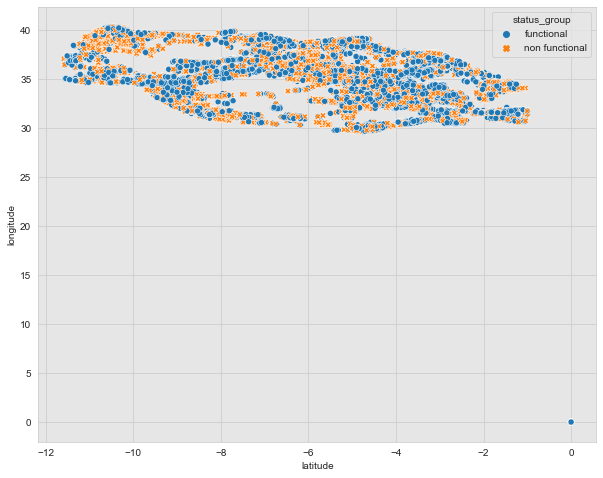

In [30]:
plt.figure(figsize=(10,8))
sns.scatterplot(x=DF['latitude'],y=DF['longitude'], data=DF, hue=('status_group'), style=('status_group'))

After analyzing the longitude and latitude column, I was hoping to create a new column referencing the data points
of lat and long combined. Unfortunately I was not able to bring this idea to life. I will have to remove the lat and long
columns as a result of this.

In [31]:
DF = DF.drop(DF[['latitude','longitude']], axis = 1)

In [32]:
DF

,status_group,amount_tsh,funder,gps_height,installer,wpt_name,basin,subvillage,region,public_meeting,scheme_management,permit,construction_year,extraction_type_class,management,payment,water_quality,quantity,source_type,waterpoint_type
0,functional,6000.0,Roman,1390,Roman,none,Lake Nyasa,Mnyusi B,Iringa,1.0,VWC,0.0,1999,gravity,vwc,pay annually,soft,enough,spring,communal standpipe
1,functional,0.0,Grumeti,1399,GRUMETI,Zahanati,Lake Victoria,Nyamara,Mara,NaN,Other,1.0,2010,gravity,wug,never pay,soft,insufficient,rainwater harvesting,communal standpipe
2,functional,25.0,Lottery Club,686,World vision,Kwa Mahundi,Pangani,Majengo,Manyara,1.0,VWC,1.0,2009,gravity,vwc,pay per bucket,soft,enough,dam,communal standpipe multiple
3,non functional,0.0,Unicef,263,UNICEF,Zahanati Ya Nanyumbu,Ruvuma / Southern Coast,Mahakamani,Mtwara,1.0,VWC,1.0,1986,submersible,vwc,never pay,soft,dry,borehole,communal standpipe multiple
4,functional,0.0,Action In A,0,Artisan,Shuleni,Lake Victoria,Kyanyamisa,Kagera,1.0,None,1.0,0,gravity,other,never pay,soft,seasonal,rainwater harvesting,communal standpipe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,functional,10.0,Germany Republi,1210,CES,Area Three Namba 27,Pangani,Kiduruni,Kilimanjaro,1.0,Water Board,1.0,1999,gravity,water board,pay per bucket,soft,enough,spring,communal standpipe
59396,functional,4700.0,Cefa-njombe,1212,Cefa,Kwa Yahona Kuvala,Rufiji,Igumbilo,Iringa,1.0,VWC,1.0,1996,gravity,vwc,pay annually,soft,enough,river/lake,communal standpipe
59397,functional,0.0,None,0,None,Mashine,Rufiji,Madungulu,Mbeya,1.0,VWC,0.0,0,handpump,vwc,pay monthly,fluoride,enough,borehole,hand pump
59398,functional,0.0,Malec,0,Musa,Mshoro,Rufiji,Mwinyi,Dodoma,1.0,VWC,1.0,0,handpump,vwc,never pay,soft,insufficient,shallow well,hand pump


In [33]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55083 entries, 0 to 59399
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   status_group           55083 non-null  object 
 1   amount_tsh             55083 non-null  float64
 2   funder                 51885 non-null  object 
 3   gps_height             55083 non-null  int64  
 4   installer              51868 non-null  object 
 5   wpt_name               55083 non-null  object 
 6   basin                  55083 non-null  object 
 7   subvillage             54713 non-null  object 
 8   region                 55083 non-null  object 
 9   public_meeting         51905 non-null  float64
 10  scheme_management      51429 non-null  object 
 11  permit                 52327 non-null  float64
 12  construction_year      55083 non-null  int64  
 13  extraction_type_class  55083 non-null  object 
 14  management             55083 non-null  object 
 15  pa

In [34]:
# viewing unique values for each column with dtype = 'object'
DF[[c for c in DF.columns if DF[c].dtype == 'object']].describe()

,status_group,funder,installer,wpt_name,basin,subvillage,region,scheme_management,extraction_type_class,management,payment,water_quality,quantity,source_type,waterpoint_type
count,55083,51885,51868,55083,55083,54713,55083,51429,55083,55083,55083,55083,55083,55083,55083
unique,2,1854,2088,35005,9,18482,21,12,7,12,7,8,5,7,7
top,functional,Government Of Tanzania,DWE,none,Lake Victoria,Majengo,Iringa,VWC,gravity,vwc,never pay,soft,enough,shallow well,communal standpipe
freq,32259,8383,15780,3487,9259,466,5171,34459,24079,37716,23441,46914,30786,15867,26262


In [35]:
# No relevancy within column values
DF['basin'].unique()

array(['Lake Nyasa', 'Lake Victoria', 'Pangani',
       'Ruvuma / Southern Coast', 'Internal', 'Lake Tanganyika',
       'Wami / Ruvu', 'Rufiji', 'Lake Rukwa'], dtype=object)

In [36]:
# next step will be to create dummy variables for each category
# and to simplify the variables, I will convert each category into a binary classification if need be

In [37]:
DF.describe()

,amount_tsh,gps_height,public_meeting,permit,construction_year
count,55083.000000,55083.000000,51905.000000,52327.000000,55083.000000
mean,321.614379,671.486230,0.911126,0.690943,1311.016920
std,3065.794824,696.404821,0.284564,0.462109,948.342454
min,0.000000,-90.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,0.000000
50%,0.000000,368.000000,1.000000,1.000000,1986.000000
75%,20.000000,1325.000000,1.000000,1.000000,2004.000000
max,350000.000000,2628.000000,1.000000,1.000000,2013.000000


In [38]:
# checking for any class imbalance before moving forward
value_count_perc = np.round(DF['status_group'].value_counts(normalize=True),2)
print(value_count_perc)

functional        0.59
non functional    0.41
Name: status_group, dtype: float64


In [39]:
# Since "status_group" wil be our target variable, I will need to convert the column into a binary value where functional = 1 
# and non functional = 2

In [40]:
DF.status_group[DF.status_group == 'functional'] = 1
DF.status_group[DF.status_group == 'non functional'] = 0

<ipython-input-40-1a020d63b36e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF.status_group[DF.status_group == 'functional'] = 1
<ipython-input-40-1a020d63b36e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF.status_group[DF.status_group == 'non functional'] = 0


In [41]:
DF['status_group'] = DF['status_group'].astype('int64')

In [42]:
DF.head()

,status_group,amount_tsh,funder,gps_height,installer,wpt_name,basin,subvillage,region,public_meeting,scheme_management,permit,construction_year,extraction_type_class,management,payment,water_quality,quantity,source_type,waterpoint_type
0,1,6000.0,Roman,1390,Roman,none,Lake Nyasa,Mnyusi B,Iringa,1.0,VWC,0.0,1999,gravity,vwc,pay annually,soft,enough,spring,communal standpipe
1,1,0.0,Grumeti,1399,GRUMETI,Zahanati,Lake Victoria,Nyamara,Mara,NaN,Other,1.0,2010,gravity,wug,never pay,soft,insufficient,rainwater harvesting,communal standpipe
2,1,25.0,Lottery Club,686,World vision,Kwa Mahundi,Pangani,Majengo,Manyara,1.0,VWC,1.0,2009,gravity,vwc,pay per bucket,soft,enough,dam,communal standpipe multiple
3,0,0.0,Unicef,263,UNICEF,Zahanati Ya Nanyumbu,Ruvuma / Southern Coast,Mahakamani,Mtwara,1.0,VWC,1.0,1986,submersible,vwc,never pay,soft,dry,borehole,communal standpipe multiple
4,1,0.0,Action In A,0,Artisan,Shuleni,Lake Victoria,Kyanyamisa,Kagera,1.0,None,1.0,0,gravity,other,never pay,soft,seasonal,rainwater harvesting,communal standpipe


In [43]:
# reprinting the value count for the target variable which is now 1 and 0
# 1 (functional) being our focus
value_count_perc = np.round(DF['status_group'].value_counts(normalize=True),2)
print(value_count_perc)

1    0.59
0    0.41
Name: status_group, dtype: float64


# INSTANTIATE A BASELINE MODEL
## Logistic Regression

In [44]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55083 entries, 0 to 59399
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   status_group           55083 non-null  int64  
 1   amount_tsh             55083 non-null  float64
 2   funder                 51885 non-null  object 
 3   gps_height             55083 non-null  int64  
 4   installer              51868 non-null  object 
 5   wpt_name               55083 non-null  object 
 6   basin                  55083 non-null  object 
 7   subvillage             54713 non-null  object 
 8   region                 55083 non-null  object 
 9   public_meeting         51905 non-null  float64
 10  scheme_management      51429 non-null  object 
 11  permit                 52327 non-null  float64
 12  construction_year      55083 non-null  int64  
 13  extraction_type_class  55083 non-null  object 
 14  management             55083 non-null  object 
 15  pa

In [45]:
DF['status_group'].dtype

dtype('int64')

In [46]:
X = DF.drop(['status_group'], axis=1)
y = DF['status_group']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25, random_state = 42)

In [47]:
# To deal with categorical values, I will group columns together based on the frequency of values
# create column with numeric values 
# create column with values less than 10 categories to OHE
# create column with values more than 10 categories

num_cols = []
ohe_cols = []
freq_cols = []

for c in X.columns:
    if DF[c].dtype in ['float64', 'int64']:
        num_cols.append(c)
    elif len(DF[c].unique()) <= 10:
        ohe_cols.append(c)
    else:
        freq_cols.append(c)

In [48]:
print(f"Numeric: {num_cols}")
print(f"OHE: {ohe_cols}")
print(f"Frequency: {freq_cols}")

Numeric: ['amount_tsh', 'gps_height', 'public_meeting', 'permit', 'construction_year']
OHE: ['basin', 'extraction_type_class', 'payment', 'water_quality', 'quantity', 'source_type', 'waterpoint_type']
Frequency: ['funder', 'installer', 'wpt_name', 'subvillage', 'region', 'scheme_management', 'management']


In [49]:
# Dealing with numeric values and adding a min-max scaler and replacing null values with the median value
numeric_transformer = Pipeline(steps=[("num_imputer", SimpleImputer(strategy="median")), 
                                      ("scaler", MinMaxScaler())])
# Dealing with categorical columns with less than 10 unique values by One Hot Encoding them. No null values
ohe_transformer = Pipeline(steps=[("ohe", OneHotEncoder(handle_unknown='ignore'))])

# Dealing with Categorical columns with more than 10 unique values by using Count Encoder. Count Encoder handles null values.
freq_transformer = Pipeline(steps=[("freq_enc", ce.CountEncoder(normalize=True, 
                                                                min_group_size=0.01,
                                                                min_group_name='other'))])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, num_cols),
        ("cat_ohe", ohe_transformer, ohe_cols),
        ("cat_freq", freq_transformer, freq_cols)], remainder='passthrough')


clf_logreg = Pipeline(steps=[('preprocessor', preprocessor),
                             ('classifier', LogisticRegression(class_weight='balanced',solver='liblinear'))])

clf_logreg.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['amount_tsh', 'gps_height',
                                                   'public_meeting', 'permit',
                                                   'construction_year']),
                                                 ('cat_ohe',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                          

In [50]:
X_train.shape

(41312, 19)

In [51]:
preprocessor.fit_transform(X_train).shape

(41312, 62)

In [52]:
# This step wasn't exactly neccessary however, I wanted to find a way to check what the column names looked like after
# using ColumnTransformer through the pipeline.
# ColumnTransformer has a way to check feature names, but since ColumnTransfer was used as part of a pipeline,
# the "preproccessor.get_feature_names" only returned the parameters of the "preproccessor" pipeline.

def get_column_names_from_ColumnTransformer(column_transformer):    
    col_name = []
    for transformer_in_columns in column_transformer.transformers_[:]:#the last transformer is ColumnTransformer's 'remainder'
        raw_col_name = transformer_in_columns[2]
        if isinstance(transformer_in_columns[1],Pipeline): 
            transformer = transformer_in_columns[1].steps[-1][1]
        else:
            transformer = transformer_in_columns[1]
        try:
            names = transformer.get_feature_names()
        except AttributeError: # if no 'get_feature_names' function, use raw column name
            names = raw_col_name
        if isinstance(names,np.ndarray): # eg.
            col_name += names.tolist()
        elif isinstance(names,list):
            col_name += names    
        elif isinstance(names,str):
            col_name.append(names)
    return col_name

get_column_names_from_ColumnTransformer(preprocessor)

['amount_tsh',
 'gps_height',
 'public_meeting',
 'permit',
 'construction_year',
 'x0_Internal',
 'x0_Lake Nyasa',
 'x0_Lake Rukwa',
 'x0_Lake Tanganyika',
 'x0_Lake Victoria',
 'x0_Pangani',
 'x0_Rufiji',
 'x0_Ruvuma / Southern Coast',
 'x0_Wami / Ruvu',
 'x1_gravity',
 'x1_handpump',
 'x1_motorpump',
 'x1_other',
 'x1_rope pump',
 'x1_submersible',
 'x1_wind-powered',
 'x2_never pay',
 'x2_other',
 'x2_pay annually',
 'x2_pay monthly',
 'x2_pay per bucket',
 'x2_pay when scheme fails',
 'x2_unknown',
 'x3_coloured',
 'x3_fluoride',
 'x3_fluoride abandoned',
 'x3_milky',
 'x3_salty',
 'x3_salty abandoned',
 'x3_soft',
 'x3_unknown',
 'x4_dry',
 'x4_enough',
 'x4_insufficient',
 'x4_seasonal',
 'x4_unknown',
 'x5_borehole',
 'x5_dam',
 'x5_other',
 'x5_rainwater harvesting',
 'x5_river/lake',
 'x5_shallow well',
 'x5_spring',
 'x6_cattle trough',
 'x6_communal standpipe',
 'x6_communal standpipe multiple',
 'x6_dam',
 'x6_hand pump',
 'x6_improved spring',
 'x6_other',
 'funder',
 'in

In [53]:
len(get_column_names_from_ColumnTransformer(preprocessor))

62

In [54]:
def evaluate(estimator, X_train, X_test, y_train, y_test):
    '''
    Evalutaion function to show scoring metrics such as f1, ROC AUC, accuracy, precision and recall
    for both the train and test sets
    Also will show a confusion matrix
    '''
    # set predictions
    train_preds = estimator.predict(X_train)
    test_preds = estimator.predict(X_test)
    
    # print scores
    print("Train Scores")
    print("------------")
    print(f"Accuracy: {np.round(accuracy_score(y_train, train_preds)*100, 2)}%")
    print(f"F1: {np.round(f1_score(y_train, train_preds)*100, 2)}%")
    print(f"ROC-AUC: {np.round(roc_auc_score(y_train, train_preds)*100, 2)}%")
    print(f"Precision: {np.round(precision_score(y_train, train_preds)*100, 2)}%")
    print(f"Recall: {np.round(recall_score(y_train, train_preds)*100, 2)}%")
    print("------" * 5)
    print("Test Scores")
    print("-----------")
    print(f"Accuracy: {np.round(accuracy_score(y_test, test_preds)*100, 2)}%")
    print(f"F1: {np.round(f1_score(y_test, test_preds)*100, 2)}%")
    print(f"ROC-AUC: {np.round(roc_auc_score(y_test, test_preds)*100, 2)}%")
    print(f"Precision: {np.round(precision_score(y_test, test_preds)*100, 2)}%")
    print(f"Recall: {np.round(recall_score(y_test, test_preds)*100, 2)}%")
    
    # plot test confusion matrix   
    plot_confusion_matrix(estimator, X_test, y_test)


        

Train Scores
------------
Accuracy: 77.21%
F1: 81.22%
ROC-AUC: 75.75%
Precision: 78.17%
Recall: 84.52%
------------------------------
Test Scores
-----------
Accuracy: 76.92%
F1: 81.05%
ROC-AUC: 75.46%
Precision: 78.97%
Recall: 83.25%


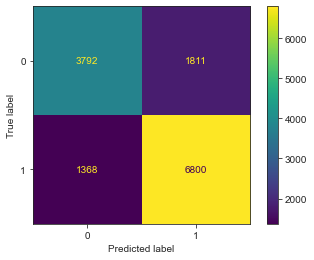

In [100]:
evaluate(clf_logreg, X_train, X_test, y_train, y_test)

Baseline model showed satisfactory results.
I would've liked to have more false negatives than false positives
I will continue to build and test other models using my pipeline, this time with more parameters within each unique
classifier to obtain the best results.

In [56]:
# feature_names = get_column_names_from_ColumnTransformer(preprocessor)

In [57]:
# coef = clf_logreg.named_steps['classifier'].coef_.flatten()

In [58]:

# # Zip coefficients and names together and make a DataFrame
# zipped = zip(feature_names, coef)
# df = pd.DataFrame(sorted(zipped), columns=["feature", "value"])
# # Sort the features by the absolute value of their coefficient
# df["abs_value"] = df["value"].apply(lambda x: abs(x))
# df["colors"] = df["value"].apply(lambda x: "green" if x > 0 else "red")
# df = df.sort_values("abs_value", ascending=False)


In [59]:


def plot_20(model):
    
    feature_names = get_column_names_from_ColumnTransformer(preprocessor)
    coef = model.named_steps['classifier'].coef_.flatten()

    # Zip coefficients and names together and make a DataFrame
    zipped = zip(feature_names, coef)
    df = pd.DataFrame(sorted(zipped), columns=["feature", "value"])
    # Sort the features by the absolute value of their coefficient
    df["abs_value"] = df["value"].apply(lambda x: abs(x))
    df["colors"] = df["value"].apply(lambda x: "green" if x > 0 else "red")
    df = df.sort_values("abs_value", ascending=False)

    fig, ax = plt.subplots(1, 1, figsize=(12, 7))
    sns.barplot(x="feature",
                y="value",
                data=df.head(20),
               palette=df.head(20)["colors"],
               orient='v')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=20)
    ax.set_title("Top 20 Features", fontsize=25)
    ax.set_ylabel("Coef", fontsize=22)
    ax.set_xlabel("Feature Name", fontsize=22)
    plt.show()

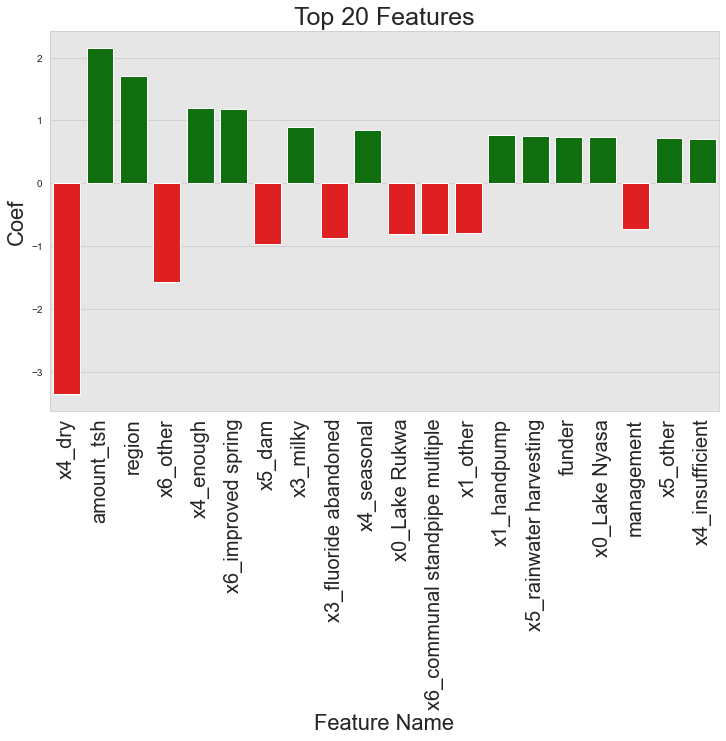

In [60]:
plot_20(clf_logreg)

# Decision Tree Model w/ Grid Search

In [61]:
clf_decision_tree = Pipeline(steps=[('preprocessor', preprocessor),
                                    ('classifier', DecisionTreeClassifier(random_state=0))])

# I will be using GridSearchCV to determine the best parameters for my classifier.
# First I will set a parameter limit to apply to the 'param_grid'

# To set paramaters for the Decision Tree Classifier, I couldn't use "max_depth" or "min_samples_split"
# as stated in the documentation because there was conflict using a pipeline method as the estimator.
# Therefore I had to use "classifier__" before the standard Decision Tree Classifier parameters.

param_limit = {
    'classifier__max_depth': [3, 5, 10],
    'classifier__min_samples_split': [4, 7],
    'classifier__min_samples_leaf': [2,4],
}


grid_decision_tree = GridSearchCV(clf_decision_tree, param_grid=param_limit)

grid_decision_tree.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('num',
                                                                         Pipeline(steps=[('num_imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          MinMaxScaler())]),
                                                                         ['amount_tsh',
                                                                          'gps_height',
                                                                          'public_meeting',
                                                                          

In [62]:
def get_best_parameters(classifier):
    best_parameters = classifier.best_params_
    
    print('Grid Search found the following optimal parameters:')
    print('-----' * 10)
    for param_name in sorted(best_parameters.keys()):
        print('%s: %r' % (param_name, best_parameters[param_name]))

In [63]:
get_best_parameters(grid_decision_tree)

Grid Search found the following optimal parameters:
--------------------------------------------------
classifier__max_depth: 10
classifier__min_samples_leaf: 4
classifier__min_samples_split: 4


Train Scores
------------
Accuracy: 80.24%
F1: 84.43%
ROC-AUC: 77.92%
Precision: 78.11%
Recall: 91.85%
------------------------------
Test Scores
-----------
Accuracy: 79.09%
F1: 83.68%
ROC-AUC: 76.5%
Precision: 77.89%
Recall: 90.4%


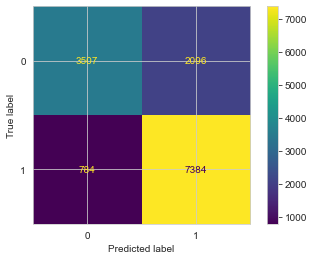

In [64]:
evaluate(grid_decision_tree, X_train, X_test, y_train, y_test)

This next step I performed the same decision tree model as a seperate test, this time without using gridsearch and instead, inputting the best parameters from the previous model. I am doing this si that I can easily extract the coefficients to plot the top 20 features.

In [65]:
clf_decision_tree_TEST = Pipeline(steps=[('preprocessor', preprocessor),
                                    ('classifier', DecisionTreeClassifier(random_state=0,
                                                                          max_depth=10,
                                                                         min_samples_leaf=4,
                                                                         min_samples_split=4))])

clf_decision_tree_TEST.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['amount_tsh', 'gps_height',
                                                   'public_meeting', 'permit',
                                                   'construction_year']),
                                                 ('cat_ohe',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                          

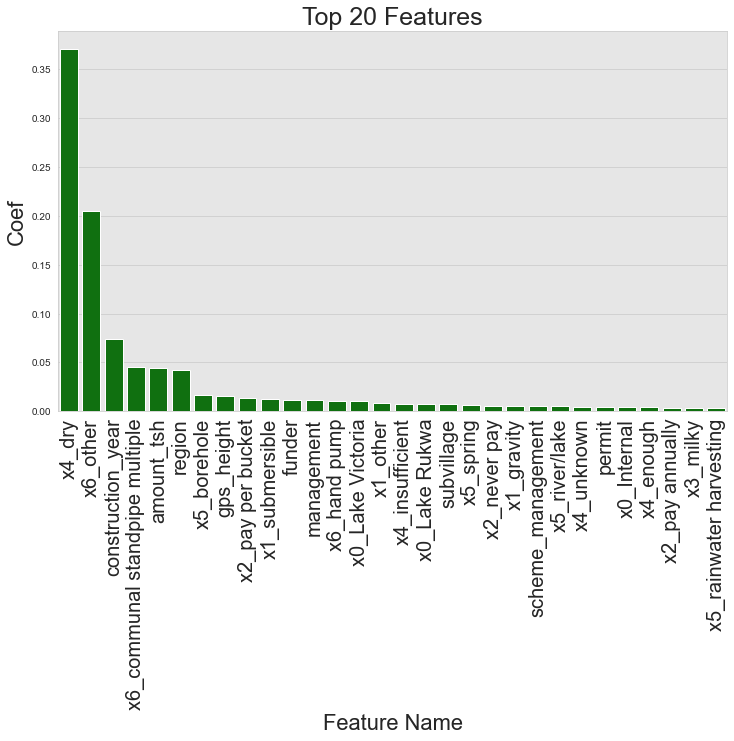

In [66]:
    feature_names = get_column_names_from_ColumnTransformer(preprocessor)
    coef = clf_decision_tree_TEST.named_steps['classifier'].feature_importances_

    # Zip coefficients and names together and make a DataFrame
    zipped = zip(feature_names, coef)
    df = pd.DataFrame(sorted(zipped), columns=["feature", "value"])
    # Sort the features by the absolute value of their coefficient
    df["abs_value"] = df["value"].apply(lambda x: abs(x))
    df["colors"] = df["value"].apply(lambda x: "green" if x > 0 else "red")
    df = df.sort_values("abs_value", ascending=False)

    fig, ax = plt.subplots(1, 1, figsize=(12, 7))
    sns.barplot(x="feature",
                y="value",
                data=df.head(30),
               palette=df.head(30)["colors"],
               orient='v')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=20)
    ax.set_title("Top 20 Features", fontsize=25)
    ax.set_ylabel("Coef", fontsize=22)
    ax.set_xlabel("Feature Name", fontsize=22)
    plt.show()

This next step, I tried to define a function that will pull the coefficients and feature names within a pipeline that is also within a grid search.

In [67]:
def plot_20_GridSearch(model):
    
    feature_names = get_column_names_from_ColumnTransformer(preprocessor)
    coef = model.best_estimator_['classifier'].coef_.flatten()

    # Zip coefficients and names together and make a DataFrame
    zipped = zip(feature_names, coef)
    df = pd.DataFrame(sorted(zipped), columns=["feature", "value"])
    # Sort the features by the absolute value of their coefficient
    df["abs_value"] = df["value"].apply(lambda x: abs(x))
    df["colors"] = df["value"].apply(lambda x: "green" if x > 0 else "red")
    df = df.sort_values("abs_value", ascending=False)

    fig, ax = plt.subplots(1, 1, figsize=(12, 7))
    sns.barplot(x="feature",
                y="value",
                data=df.head(20),
               palette=df.head(20)["colors"],
               orient='v')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=20)
    ax.set_title("Top 20 Features", fontsize=25)
    ax.set_ylabel("Coef", fontsize=22)
    ax.set_xlabel("Feature Name", fontsize=22)
    plt.show()

In [68]:
coef = grid_decision_tree.best_estimator_['classifier'].get_params()

# K-Nearest Neighbors

In [69]:
clf_knn = Pipeline(steps=[('preprocessor', preprocessor),
                          ('classifier', KNeighborsClassifier())])

param_limit = {
    'classifier__n_neighbors': [5, 11, 25],
    'classifier__weights': ['uniform', 'distance'],
}


grid_knn = GridSearchCV(clf_knn, param_grid=param_limit)

grid_knn.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('num',
                                                                         Pipeline(steps=[('num_imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          MinMaxScaler())]),
                                                                         ['amount_tsh',
                                                                          'gps_height',
                                                                          'public_meeting',
                                                                          

In [70]:
get_best_parameters(grid_knn)

Grid Search found the following optimal parameters:
--------------------------------------------------
classifier__n_neighbors: 11
classifier__weights: 'uniform'


Train Scores
------------
Accuracy: 84.45%
F1: 87.26%
ROC-AUC: 83.09%
Precision: 83.57%
Recall: 91.29%
------------------------------
Test Scores
-----------
Accuracy: 82.4%
F1: 85.72%
ROC-AUC: 80.87%
Precision: 82.61%
Recall: 89.07%


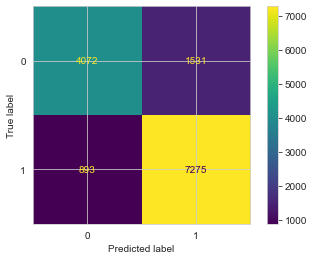

In [71]:
evaluate(grid_knn, X_train, X_test, y_train, y_test)

# Random Forest Model

In [72]:
clf_RF= Pipeline(steps=[('preprocessor', preprocessor),
                          ('classifier', RandomForestClassifier(random_state=0))])

param_limit = {
    'classifier__criterion': ['gini', 'entropy'],
    'classifier__max_depth': [5, 10, 15],
    'classifier__min_samples_split': [2, 5],
    'classifier__min_samples_leaf': [1, 3],
}


grid_RF = GridSearchCV(clf_RF, param_grid=param_limit)

grid_RF.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('num',
                                                                         Pipeline(steps=[('num_imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          MinMaxScaler())]),
                                                                         ['amount_tsh',
                                                                          'gps_height',
                                                                          'public_meeting',
                                                                          

In [73]:
get_best_parameters(grid_RF)

Grid Search found the following optimal parameters:
--------------------------------------------------
classifier__criterion: 'entropy'
classifier__max_depth: 15
classifier__min_samples_leaf: 1
classifier__min_samples_split: 2


Train Scores
------------
Accuracy: 87.51%
F1: 90.11%
ROC-AUC: 85.52%
Precision: 83.74%
Recall: 97.51%
------------------------------
Test Scores
-----------
Accuracy: 83.86%
F1: 87.38%
ROC-AUC: 81.5%
Precision: 81.49%
Recall: 94.18%


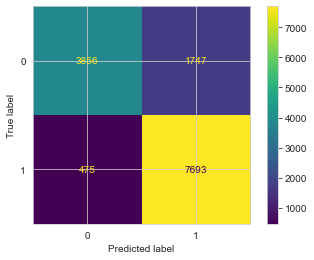

In [74]:
evaluate(grid_RF, X_train, X_test, y_train, y_test)

# XGBoost Model

In [75]:
t0 = time.time()
clf_XG = Pipeline(steps=[('preprocessor', preprocessor),
                          ('classifier', XGBClassifier(use_label_encoder=False, disable_default_eval_metric=True))])

param_limit = {
    'classifier__learning_rate': [0.1, 0.2],
    'classifier__max_depth': [15, 20],
    'classifier__gamma': [0,1],
    'classifier__min_child_weight': [1, 2],
    'classifier__subsample': [0.5, 1],
    'classifier__n_estimators': [100]
}


grid_XG = GridSearchCV(clf_XG, param_grid=param_limit)

grid_XG.fit(X_train, y_train)
t1 = time.time()

total = t1-t0

In [76]:
get_best_parameters(grid_XG)

Grid Search found the following optimal parameters:
--------------------------------------------------
classifier__gamma: 0
classifier__learning_rate: 0.1
classifier__max_depth: 15
classifier__min_child_weight: 2
classifier__n_estimators: 100
classifier__subsample: 1


Train Scores
------------
Accuracy: 92.35%
F1: 93.67%
ROC-AUC: 91.39%
Precision: 90.44%
Recall: 97.15%
------------------------------
Test Scores
-----------
Accuracy: 84.58%
F1: 87.55%
ROC-AUC: 83.03%
Precision: 84.03%
Recall: 91.37%


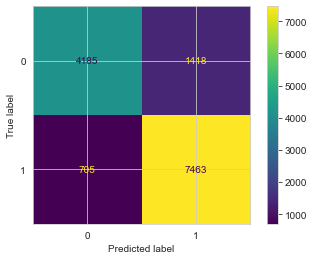

In [77]:
evaluate(grid_XG, X_train, X_test, y_train, y_test)

# Support Vector Machine Model

In [78]:
t0 = time.time()
clf_svm = Pipeline(steps=[('preprocessor', preprocessor),
                          ('classifier', SVC(probability=True))])

param_limit = {
    'classifier__C': [10, 12],
    'classifier__kernel': ['rbf'],
    'classifier__gamma': ['scale']
}


grid_svm = GridSearchCV(clf_svm, param_grid=param_limit)

grid_svm.fit(X_train, y_train)
t1 = time.time()

total = t1-t0

In [82]:
total

7005.428418636322

In [83]:
get_best_parameters(grid_svm)

Grid Search found the following optimal parameters:
--------------------------------------------------
classifier__C: 10
classifier__gamma: 'scale'
classifier__kernel: 'rbf'


Train Scores
------------
Accuracy: 92.35%
F1: 93.67%
ROC-AUC: 91.39%
Precision: 90.44%
Recall: 97.15%
------------------------------
Test Scores
-----------
Accuracy: 84.58%
F1: 87.55%
ROC-AUC: 83.03%
Precision: 84.03%
Recall: 91.37%


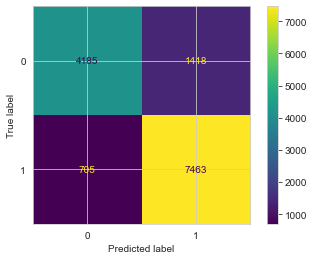

In [84]:
evaluate(grid_XG, X_train, X_test, y_train, y_test)

# Final Model Further Evaluation and Tuning - KNN

# Top performing parameters from initial gridsearch knn model:
    

Train Scores
------------
Accuracy: 84.45%
F1: 87.26%
ROC-AUC: 83.09%
Precision: 83.57%
Recall: 91.29%
------------------------------
Test Scores
-----------
Accuracy: 82.4%
F1: 85.72%
ROC-AUC: 80.87%
Precision: 82.61%
Recall: 89.07%
None
Grid Search found the following optimal parameters:
--------------------------------------------------
classifier__n_neighbors: 11
classifier__weights: 'uniform'
None


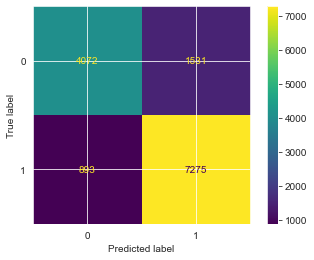

In [97]:
print(evaluate(grid_knn, X_train, X_test, y_train, y_test))
print(get_best_parameters(grid_knn))

### First Attempt

In [ ]:
clf_knn_final_f1 = Pipeline(steps=[('preprocessor', preprocessor),
                          ('classifier', KNeighborsClassifier())])

param_limit = {
    'classifier__n_neighbors': [7, 11],
    'classifier__weights': ['uniform', 'distance'],
    'classifier__leaf_size': [30, 35, 40],
    'classifier__p': [1, 2],
}


grid_knn_final_f1 = GridSearchCV(clf_knn_final_f1, param_grid=param_limit)

grid_knn_final_f1.fit(X_train, y_train)

In [88]:
get_best_parameters(grid_knn_final_f1)

Grid Search found the following optimal parameters:
--------------------------------------------------
classifier__leaf_size: 30
classifier__n_neighbors: 7
classifier__p: 1
classifier__weights: 'uniform'


Train Scores
------------
Accuracy: 86.01%
F1: 88.46%
ROC-AUC: 84.83%
Precision: 85.23%
Recall: 91.95%
------------------------------
Test Scores
-----------
Accuracy: 82.75%
F1: 85.93%
ROC-AUC: 81.36%
Precision: 83.23%
Recall: 88.82%


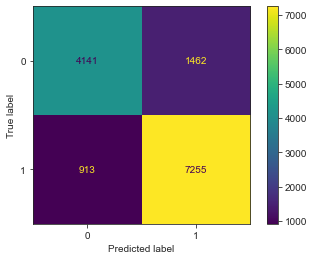

In [101]:
evaluate(grid_knn_final_f1, X_train, X_test, y_train, y_test)

### Second Attempt

In [ ]:
clf_knn_final_2nd = Pipeline(steps=[('preprocessor', preprocessor),
                          ('classifier', KNeighborsClassifier())])

param_limit = {
    'classifier__n_neighbors': [5, 7, 9],
    'classifier__weights': ['uniform'],
    'classifier__leaf_size': [20, 25, 30],
    'classifier__p': [1, 2],
    'classifier__algorithm': ['ball_tree','kd_tree','brute']
}


grid_knn_final_2nd = GridSearchCV(clf_knn_final_2nd, param_grid=param_limit)

grid_knn_final_2nd.fit(X_train, y_train)

In [ ]:
get_best_parameters(grid_knn_final_2nd)

In [ ]:
evaluate(grid_knn_final_2nd, X_train, X_test, y_train, y_test)